In [1]:
AI_TOD_class = {'airplane', 'bridge', 'storage-tank', 'ship', 'swimming-pool', 'vehicle', 'person', 'wind-mill'}

In [2]:
xview_class_labels = {}
file1 = open('for_label_converting/xview_class_labels.txt', 'r')
lines1 = file1.readlines()
for line in lines1:
    cls_id, cls_name = line.strip().split(':')
    xview_class_labels.setdefault(int(cls_id), cls_name)
xview_class_labels

{11: 'Fixed-wing Aircraft',
 12: 'Small Aircraft',
 13: 'Cargo Plane',
 15: 'Helicopter',
 17: 'Passenger Vehicle',
 18: 'Small Car',
 19: 'Bus',
 20: 'Pickup Truck',
 21: 'Utility Truck',
 23: 'Truck',
 24: 'Cargo Truck',
 25: 'Truck w/Box',
 26: 'Truck Tractor',
 27: 'Trailer',
 28: 'Truck w/Flatbed',
 29: 'Truck w/Liquid',
 32: 'Crane Truck',
 33: 'Railway Vehicle',
 34: 'Passenger Car',
 35: 'Cargo Car',
 36: 'Flat Car',
 37: 'Tank car',
 38: 'Locomotive',
 40: 'Maritime Vessel',
 41: 'Motorboat',
 42: 'Sailboat',
 44: 'Tugboat',
 45: 'Barge',
 47: 'Fishing Vessel',
 49: 'Ferry',
 50: 'Yacht',
 51: 'Container Ship',
 52: 'Oil Tanker',
 53: 'Engineering Vehicle',
 54: 'Tower crane',
 55: 'Container Crane',
 56: 'Reach Stacker',
 57: 'Straddle Carrier',
 59: 'Mobile Crane',
 60: 'Dump Truck',
 61: 'Haul Truck',
 62: 'Scraper/Tractor',
 63: 'Front loader/Bulldozer',
 64: 'Excavator',
 65: 'Cement Mixer',
 66: 'Ground Grader',
 71: 'Hut/Tent',
 72: 'Shed',
 73: 'Building',
 74: 'Aircra

In [3]:
converted_class = {}
file1 = open('for_label_converting/converted_class.txt', 'r')
lines1 = file1.readlines()
for line in lines1:
    cls_name, cvt_cls_name = line.strip().split(':')
    converted_class.setdefault(cls_name, cvt_cls_name)
converted_class, set(x for x in converted_class.values())

({'Fixed-wing Aircraft': 'airplane',
  'Small Aircraft': 'airplane',
  'Cargo Plane': 'airplane',
  'Helicopter': 'None',
  'Passenger Vehicle': 'vehicle',
  'Small Car': 'vehicle',
  'Bus': 'vehicle',
  'Pickup Truck': 'vehicle',
  'Utility Truck': 'vehicle',
  'Truck': 'vehicle',
  'Cargo Truck': 'vehicle',
  'Truck w/Box': 'vehicle',
  'Truck Tractor': 'vehicle',
  'Trailer': 'vehicle',
  'Truck w/Flatbed': 'vehicle',
  'Truck w/Liquid': 'vehicle',
  'Crane Truck': 'vehicle',
  'Railway Vehicle': 'vehicle',
  'Passenger Car': 'vehicle',
  'Cargo Car': 'vehicle',
  'Flat Car': 'vehicle',
  'Tank car': 'vehicle',
  'Locomotive': 'vehicle',
  'Maritime Vessel': 'ship',
  'Motorboat': 'ship',
  'Sailboat': 'ship',
  'Tugboat': 'ship',
  'Barge': 'ship',
  'Fishing Vessel': 'ship',
  'Ferry': 'ship',
  'Yacht': 'ship',
  'Container Ship': 'ship',
  'Oil Tanker': 'ship',
  'Engineering Vehicle': 'vehicle',
  'Tower crane': 'None',
  'Container Crane': 'None',
  'Reach Stacker': 'None',
  

In [4]:
xview_converted_class = {}
for key, value in xview_class_labels.items():
    xview_converted_class.setdefault(key, None if converted_class[value]=='None' else converted_class[value])
xview_converted_class, set(x for x in xview_converted_class.values())

({11: 'airplane',
  12: 'airplane',
  13: 'airplane',
  15: None,
  17: 'vehicle',
  18: 'vehicle',
  19: 'vehicle',
  20: 'vehicle',
  21: 'vehicle',
  23: 'vehicle',
  24: 'vehicle',
  25: 'vehicle',
  26: 'vehicle',
  27: 'vehicle',
  28: 'vehicle',
  29: 'vehicle',
  32: 'vehicle',
  33: 'vehicle',
  34: 'vehicle',
  35: 'vehicle',
  36: 'vehicle',
  37: 'vehicle',
  38: 'vehicle',
  40: 'ship',
  41: 'ship',
  42: 'ship',
  44: 'ship',
  45: 'ship',
  47: 'ship',
  49: 'ship',
  50: 'ship',
  51: 'ship',
  52: 'ship',
  53: 'vehicle',
  54: None,
  55: None,
  56: None,
  57: None,
  59: 'vehicle',
  60: 'vehicle',
  61: 'vehicle',
  62: 'vehicle',
  63: 'vehicle',
  64: 'vehicle',
  65: 'vehicle',
  66: 'vehicle',
  71: None,
  72: None,
  73: None,
  74: None,
  76: None,
  77: None,
  79: None,
  83: None,
  84: None,
  86: 'storage-tank',
  89: None,
  91: None,
  93: None,
  94: None,
  75: None,
  82: None},
 {None, 'airplane', 'ship', 'storage-tank', 'vehicle'})

In [5]:
'''
xView training set: It is a large-scale object detection dataset which consists of
1,415km2 of WorldView-3 at 30cm resolution. The annotated dataset for object detection
contains over 1 million object instances across 60 classes, including various types of
vehicles, planes, and ships.
'''

class_map = {None: -1, 'airplane': 0, 'ship': 1, 'storage-tank': 2, 'vehicle': 3}
reversed_class_map = {-1: None, 0: 'airplane', 1: 'ship', 2: 'storage-tank', 3: 'vehicle'}
class_map, reversed_class_map

({None: -1, 'airplane': 0, 'ship': 1, 'storage-tank': 2, 'vehicle': 3},
 {-1: None, 0: 'airplane', 1: 'ship', 2: 'storage-tank', 3: 'vehicle'})

In [6]:
import json
import pandas as pd

labe_path = 'for_label_converting/xView_train.geojson'
data = json.load(open(labe_path))
data['features'][0]

{'type': 'Feature',
 'properties': {'bounds_imcoords': '2712,1145,2746,1177',
  'edited_by': 'wwoscarbecerril',
  'cat_id': '1040010028371A00',
  'type_id': 73,
  'ingest_time': '2017/07/24 12:49:09.118+00',
  'index_right': 2356,
  'image_id': '2355.tif',
  'point_geom': '0101000020E6100000616E4E6406A256C03BE6ADA0D6212D40',
  'feature_id': 374410,
  'grid_file': 'Grid2.shp'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-90.53169885094464, 14.56603647302396],
    [-90.53169885094464, 14.56614473506768],
    [-90.53158140073565, 14.56614473506768],
    [-90.53158140073565, 14.56603647302396],
    [-90.53169885094464, 14.56603647302396]]]}}

In [7]:
df = pd.json_normalize(data['features'])
df.head()

,type,properties.bounds_imcoords,properties.edited_by,properties.cat_id,properties.type_id,properties.ingest_time,properties.index_right,properties.image_id,properties.point_geom,properties.feature_id,properties.grid_file,geometry.type,geometry.coordinates
0,Feature,"2712,1145,2746,1177",wwoscarbecerril,1040010028371A00,73,2017/07/24 12:49:09.118+00,2356,2355.tif,0101000020E6100000616E4E6406A256C03BE6ADA0D621...,374410,Grid2.shp,Polygon,"[[[-90.53169885094464, 14.56603647302396], [-9..."
1,Feature,"2720,2233,2760,2288",wwoscarbecerril,1040010028371A00,73,2017/07/24 17:26:05.701+00,2356,2355.tif,0101000020E6100000042D0CC705A256C0004F7071E71F...,394393,Grid2.shp,Polygon,"[[[-90.53167232380382, 14.562217332510999], [-..."
2,Feature,"2687,1338,2740,1399",wwoscarbecerril,1040010028371A00,73,2017/07/24 12:45:09.081+00,2356,2355.tif,0101000020E6100000B29F7E4707A256C0000AE6537921...,374031,Grid2.shp,Polygon,"[[[-90.53178519354792, 14.565273205700436], [-..."
3,Feature,"2691,1201,2730,1268",wwoscarbecerril,1040010028371A00,73,2017/07/24 12:49:09.118+00,2356,2355.tif,0101000020E6100000CE53137207A256C00EBF7084B521...,374409,Grid2.shp,Polygon,"[[[-90.53177155821692, 14.56572251279647], [-9..."
4,Feature,"2671,838,2714,869",wwoscarbecerril,1040010028371A00,73,2017/07/24 13:20:38.280+00,2356,2355.tif,0101000020E610000060DE147608A256C05D6A384C6122...,377368,Grid2.shp,Polygon,"[[[-90.5318405973036, 14.567095271471638], [-9..."


In [8]:
columns = ['properties.image_id', 'properties.type_id', 'properties.bounds_imcoords']

df1 = pd.DataFrame(df, columns=columns)
df1.head(), len(df1)

(  properties.image_id  properties.type_id properties.bounds_imcoords
 0            2355.tif                  73        2712,1145,2746,1177
 1            2355.tif                  73        2720,2233,2760,2288
 2            2355.tif                  73        2687,1338,2740,1399
 3            2355.tif                  73        2691,1201,2730,1268
 4            2355.tif                  73          2671,838,2714,869,
 601937)

In [9]:
invalid_box_idx = []
for index, row in df1.iterrows():
    box = row['properties.bounds_imcoords']
    x_min, y_min, x_max, y_max = [int(i) for i in box.split(',')]
    if x_min==x_max or y_min==y_max:
        invalid_box_idx.append(index)

invalid_box_idx

[36653, 108017, 301988, 321643, 360543, 463231, 474410, 527056, 529238]

In [10]:
df1.drop(df.index[invalid_box_idx], inplace=True)

index = [class_map[xview_converted_class[cls]] for cls in df1['properties.type_id']]
df1.insert(loc = 1,
          column = 'class',
          value = index)

bbox = [([int(i) for i in box.split(',')]) for box in df1['properties.bounds_imcoords']]
df1.insert(loc = 2,
          column = 'bbox',
          value = bbox)

# 1395.tif missing
df1.drop(df1[df1['properties.image_id']=='1395.tif'].index, inplace=True)

df1 = df1[df1['class'] != class_map[None]]

del_name = ['properties.type_id', 'properties.bounds_imcoords']
df1 = df1.drop(del_name, axis=1)

new_name = {'properties.image_id': 'image'}
df1.rename(columns=new_name,
          inplace=True)
 
df1.head(), len(df1)

(       image  class                      bbox
 40  2355.tif      3  [2726, 2512, 2740, 2518]
 41  2355.tif      3  [2729, 2494, 2737, 2504]
 42  2355.tif      3  [2726, 2501, 2737, 2513]
 63  2355.tif      3       [1858, 0, 1872, 19]
 70  2355.tif      3    [1912, 153, 1925, 162],
 270295)

In [11]:
from collections import Counter

C = df1['class']
cat = {f'{k}-{reversed_class_map[k]}': v for k, v in sorted(dict(Counter(C)).items(), key=lambda item: item[1], reverse=True)}
cat = dict(sorted(cat.items()))
cat

{'0-airplane': 1160,
 '1-ship': 5141,
 '2-storage-tank': 1712,
 '3-vehicle': 262282}

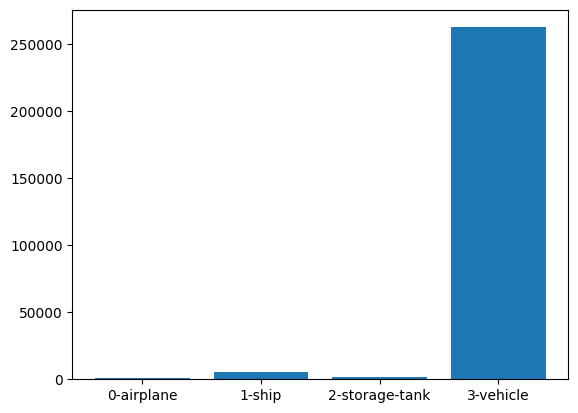

In [12]:
import matplotlib.pyplot as plt

plt.bar(*zip(*cat.items()))
plt.show()

In [13]:
lines = df1.values.tolist()
lines[:5]

[['2355.tif', 3, [2726, 2512, 2740, 2518]],
 ['2355.tif', 3, [2729, 2494, 2737, 2504]],
 ['2355.tif', 3, [2726, 2501, 2737, 2513]],
 ['2355.tif', 3, [1858, 0, 1872, 19]],
 ['2355.tif', 3, [1912, 153, 1925, 162]]]

In [14]:
final_label = {}
for name, id, box in lines:
    final_label.setdefault(name, []).append((id, box))

len(final_label)

788

In [15]:
from copy import deepcopy
new_dict = deepcopy(final_label)

In [16]:
for key, value in new_dict.items():
    image_name = key.split('.')[0]
    with open(f"dataset/labels/{image_name}.txt", "w") as file:
        for v in value:
            cls_id, b = v
            c = b + [cls_id]
            s = ', '.join(str(x) for x in c)
            file.writelines(s+'\n') 

In [17]:
out_label = "dataset/compact_label.json"
with open(out_label, "w") as outfile:
    json.dump(final_label, outfile)

In [18]:
image_id = 'dataset/images/163.tif'
df2 = df1[df1['image']==image_id.split('/')[-1]]
df2

,image,class,bbox
599189,163.tif,1,"[2887, 60, 3086, 302]"
599190,163.tif,1,"[2890, 247, 2933, 263]"
599191,163.tif,1,"[3023, 89, 3211, 265]"
599192,163.tif,1,"[380, 2065, 414, 2097]"


In [19]:
classes = df2['class']
cat = {f'{k}-{reversed_class_map[k]}': v for k, v in sorted(dict(Counter(classes)).items(), key=lambda item: item[1], reverse=True)}
cat, len(cat)

({'1-ship': 4}, 1)

In [20]:
bboxes = df2['bbox'].to_list()
bboxes[:5]  # [xmin, ymin, xmax, ymax]

[[2887, 60, 3086, 302],
 [2890, 247, 2933, 263],
 [3023, 89, 3211, 265],
 [380, 2065, 414, 2097]]

In [21]:
columns = ['bbox', 'class']
labels_df = pd.DataFrame(df2, columns=columns)
labels = labels_df.values.tolist()
labels[:5]

[[[2887, 60, 3086, 302], 1],
 [[2890, 247, 2933, 263], 1],
 [[3023, 89, 3211, 265], 1],
 [[380, 2065, 414, 2097], 1]]

In [22]:
import cv2

img = cv2.imread(image_id, -1)
img.shape

(2606, 3093, 3)

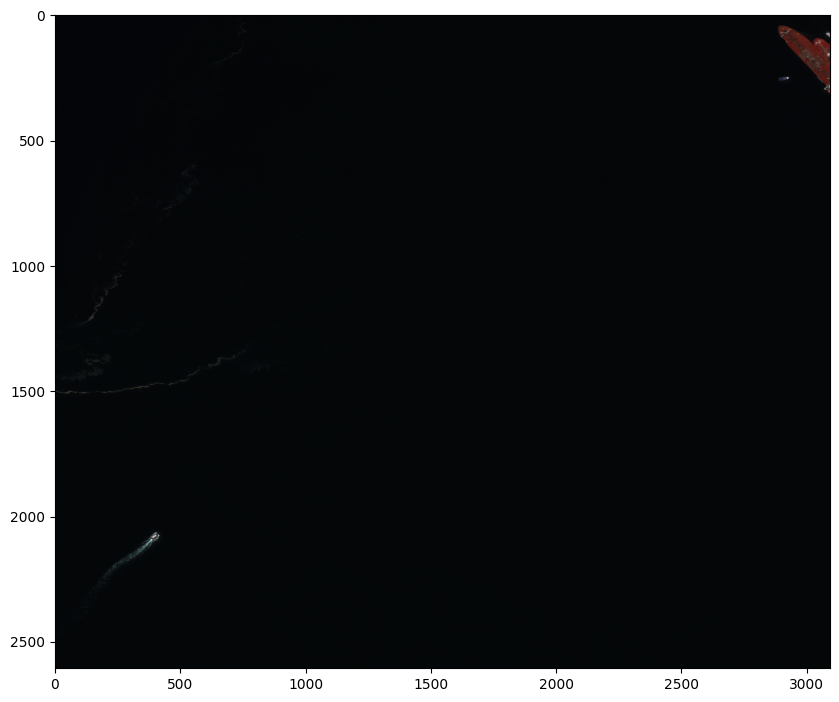

In [23]:
plt.figure(figsize=(10,10))
plt.imshow(img[:,:,::-1])

In [24]:
from seaborn import color_palette


def make_color_map():
    '''
        Create a color map for each class
    '''
    names = sorted(set(list(reversed_class_map.keys())))
    n = len(names)
    cp = color_palette("Paired", n)

    cp[:] = [tuple(int(255*c) for c in rgb) for rgb in cp]

    return dict(zip(names, cp))

def plot_bboxes(img, bboxes):
    show_img = img.copy()
    color_map = make_color_map()

    fontFace = cv2.FONT_HERSHEY_SIMPLEX
    scale = 0.5

    for bbox in bboxes:
        label = bbox[1]
        if label == class_map['airplane']:
            color = (0,255,0)
            thickness = 2
        else:
            thickness = 1
            color = color_map[label]
        pts = bbox[0]
        pt1 = (pts[0], pts[1])
        pt2 = (pts[2], pts[3])

        cv2.rectangle(show_img, pt1, pt2, color, thickness)

        _, baseline = cv2.getTextSize(str(label), fontFace=fontFace,
                                             fontScale=scale,
                                             thickness=thickness)

        cv2.putText(show_img, str(reversed_class_map[label]), (pt1[0], pt1[1]-baseline),
                    fontFace, scale, color_map[label], thickness)
                
    return show_img

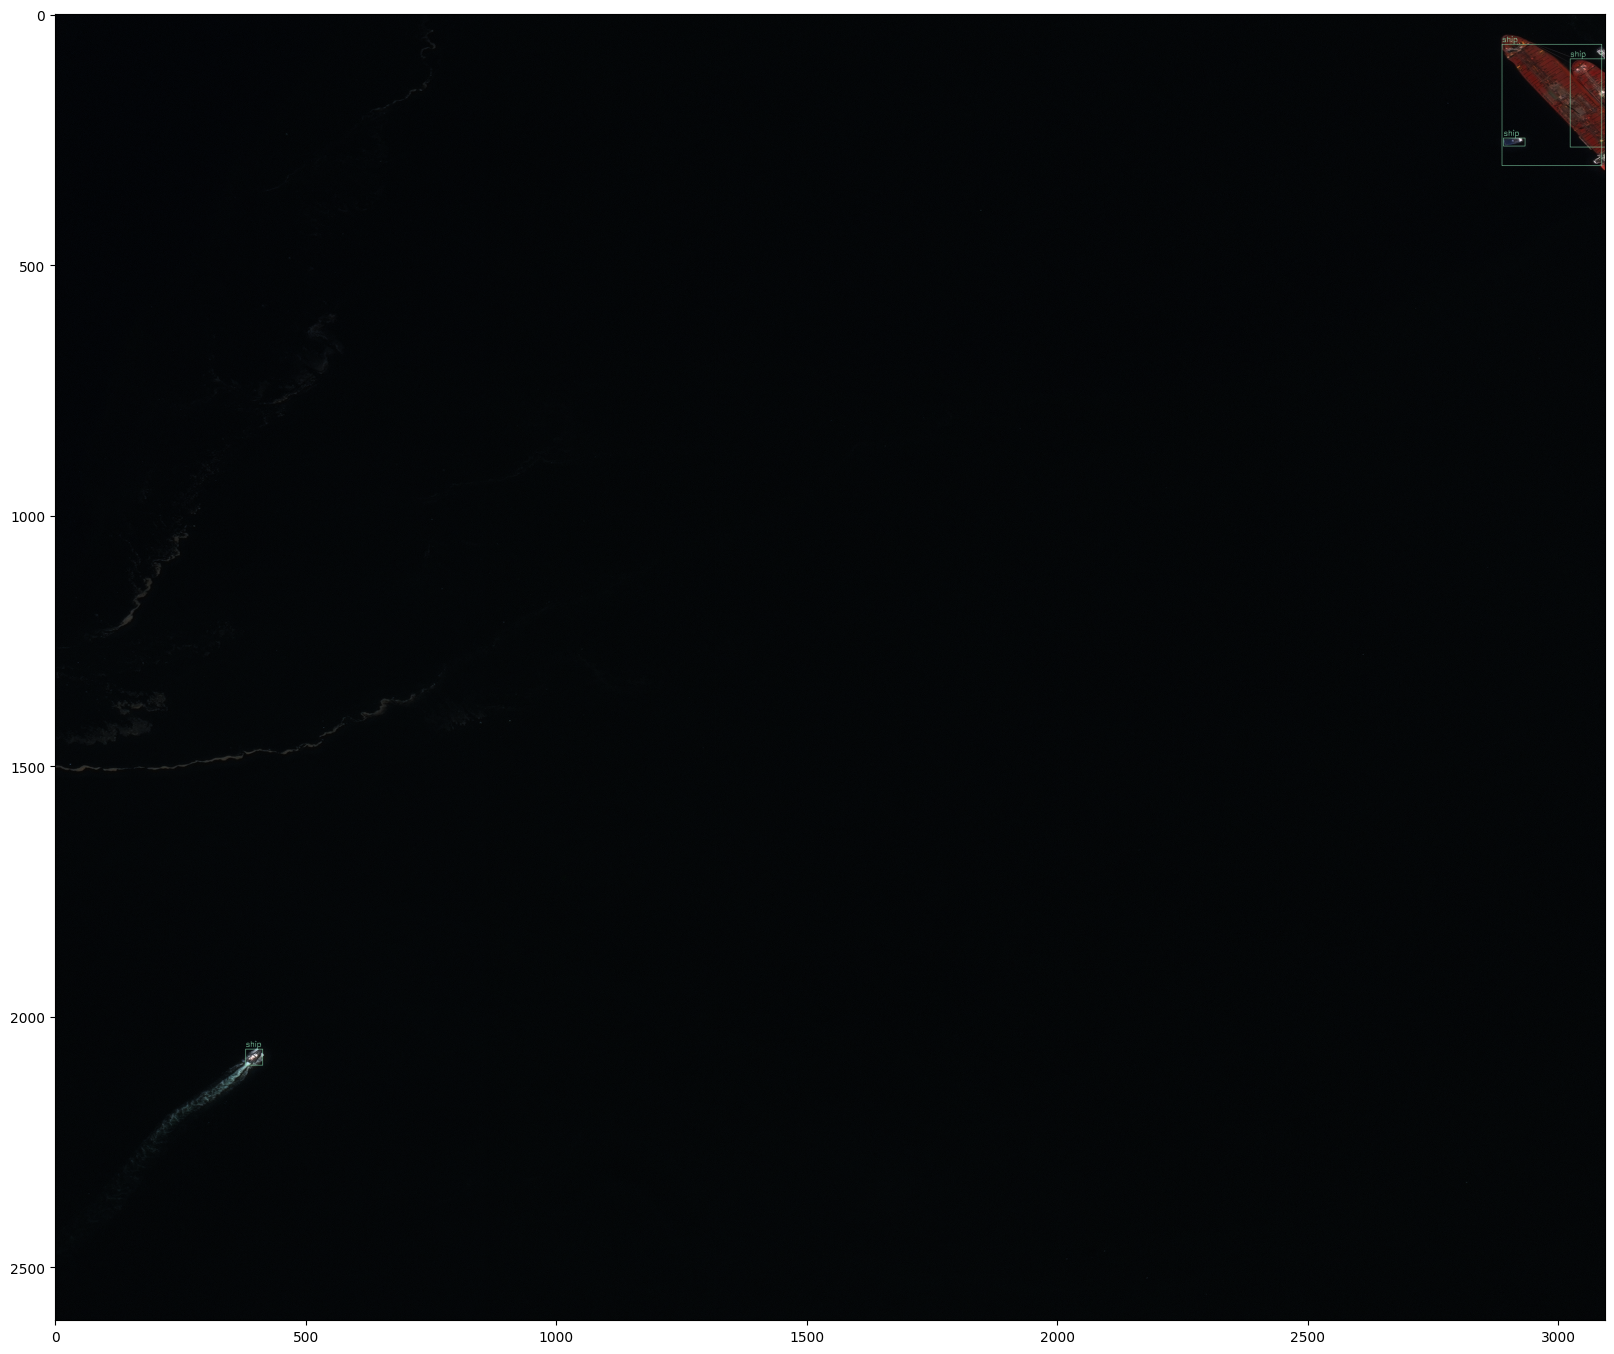

In [25]:
annot_img = plot_bboxes(img, labels)

plt.figure(figsize=(20,20))
plt.imshow(annot_img[:,:,::-1])

In [26]:
import os

img_folder = 'dataset/images'
for img in os.listdir(img_folder):
    img_path = os.path.join(img_folder, img)
    label_path = img_path.replace('images', 'labels').replace('tif', 'txt')
    if not os.path.isfile(label_path):
        os.remove(img_path)


In [27]:
img_folder = 'dataset/images'
img_name = [name[:-4] for name in os.listdir(img_folder)]

label_folder = 'dataset/labels'
label_name = [name[:-4] for name in os.listdir(label_folder)]

len(img_name), len(label_name), set(label_name) ^ set(img_name)

(788, 788, set())